In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.tail(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

The dataset exhibits a dual data structure which is object & float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df['Happiness Score'].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

In [8]:
print (df['Happiness Score'].unique())
print (df['Happiness Score'].nunique())

[7.587 7.561 7.527 7.522 7.427 7.406 7.378 7.364 7.286 7.284 7.278 7.226
 7.2   7.187 7.119 6.983 6.946 6.94  6.937 6.901 6.867 6.853 6.81  6.798
 6.786 6.75  6.67  6.611 6.575 6.574 6.505 6.485 6.477 6.455 6.411 6.329
 6.302 6.298 6.295 6.269 6.168 6.13  6.123 6.003 5.995 5.987 5.984 5.975
 5.96  5.948 5.89  5.889 5.878 5.855 5.848 5.833 5.828 5.824 5.813 5.791
 5.77  5.759 5.754 5.716 5.709 5.695 5.689 5.605 5.589 5.548 5.477 5.474
 5.429 5.399 5.36  5.332 5.286 5.268 5.253 5.212 5.194 5.192 5.14  5.129
 5.124 5.123 5.102 5.098 5.073 5.057 5.013 5.007 4.971 4.959 4.949 4.898
 4.885 4.876 4.874 4.867 4.857 4.839 4.8   4.788 4.786 4.739 4.715 4.694
 4.686 4.681 4.677 4.642 4.633 4.61  4.571 4.565 4.55  4.518 4.517 4.514
 4.512 4.507 4.436 4.419 4.369 4.35  4.332 4.307 4.297 4.292 4.271 4.252
 4.218 4.194 4.077 4.033 3.995 3.989 3.956 3.931 3.904 3.896 3.845 3.819
 3.781 3.681 3.678 3.667 3.656 3.655 3.587 3.575 3.465 3.34  3.006 2.905
 2.839]
157


The dataset exhibits a high diversity of unique values, suggesting that it is more conducive to being treated as a regression problem

In [9]:
df.nunique().to_frame('No of unique values')

,No of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


The dataset exhibit a high divercity of unique values in every columns

In [10]:
for i in df.columns:
    print (df[i].value_counts())
    print ('\n')

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

# Exploratory Data Analysis

Univariate Anasysis

<Axes: xlabel='Standard Error', ylabel='Density'>

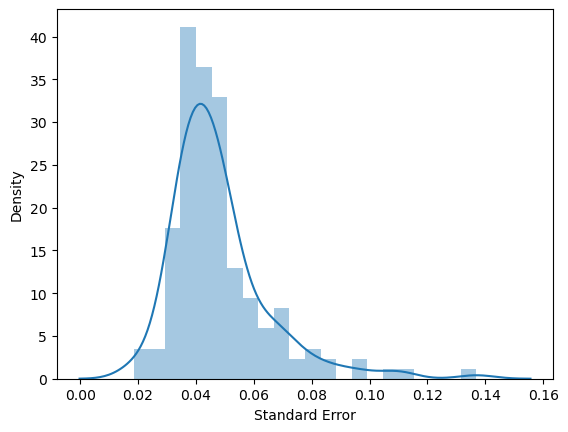

In [11]:
sns.distplot(df['Standard Error'])

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Count'>

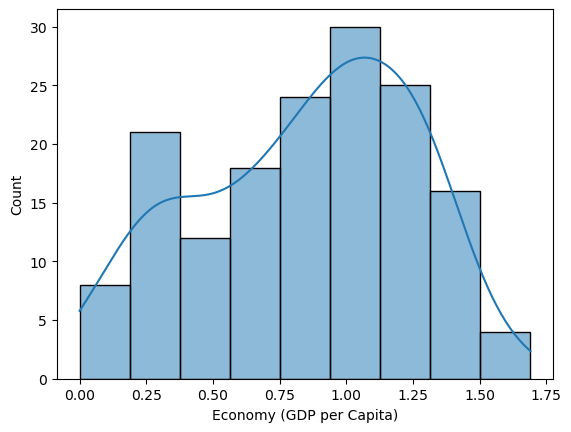

In [12]:
sns.histplot(df['Economy (GDP per Capita)'],kde=True)

<Axes: xlabel='Family', ylabel='Density'>

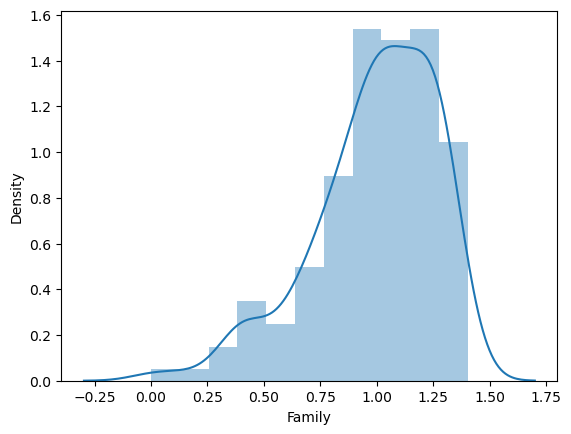

In [13]:
sns.distplot(df['Family'])

In [14]:
catagorical_col=[]
Numarical_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catagorical_col.append(i)
        
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        Numarical_col.append(i)
        
        

In [15]:
Numarical_col

['Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

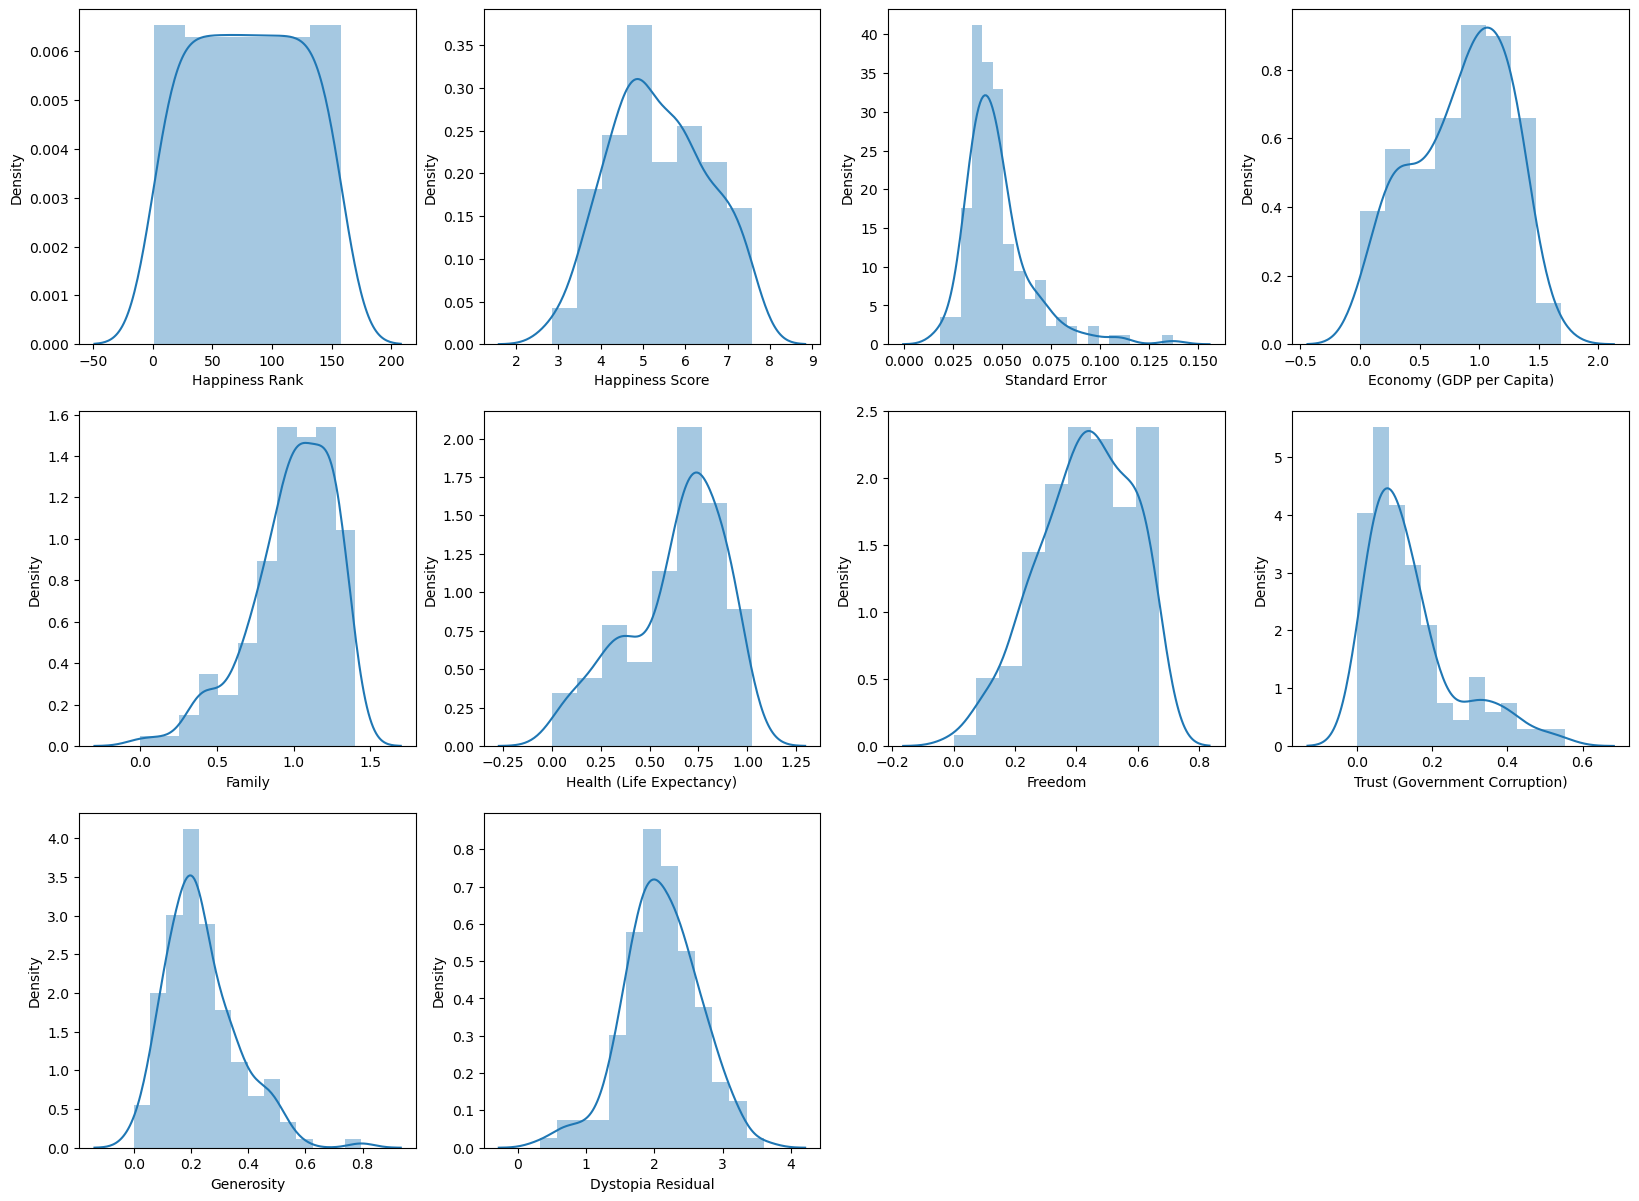

In [16]:
plt.figure(figsize=(20,20))
p=1
for i in Numarical_col:
    if p<=10:
        plt.subplot(4,4,p)
        sns.distplot(df[i])
        plt.xlabel (i)
    p+=1
plt.show()

The numerical columns in the dataset demonstrate a distribution pattern closely resembling a normal distribution

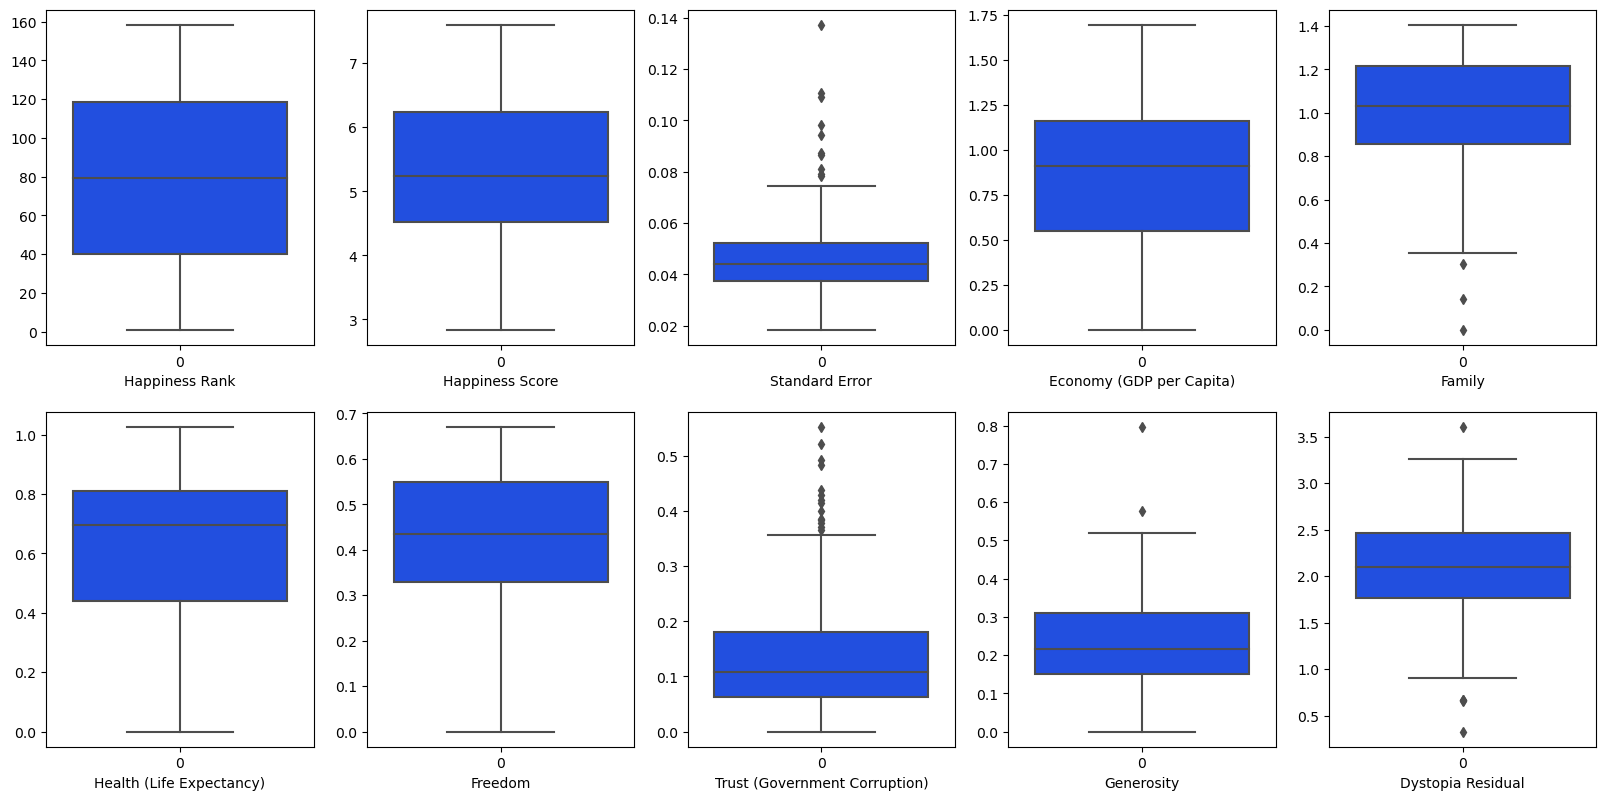

In [17]:
plt.figure(figsize=(20,20))
p=1
for i in Numarical_col:
    if p<=10:
        plt.subplot(4,5,p)
        sns.boxplot(df[i],palette='bright')
        plt.xlabel(i)
    p+=1
plt.show()

The presence of outliers in the 'Standard Error,' 'Family,' 'Trust,' 'Generosity,' and 'Dystopia Residual' columns,to confirm the outliers i have to perform descriptive analysis aall numarical columns

# Exploratory Data Analysis

Bivariate analysis

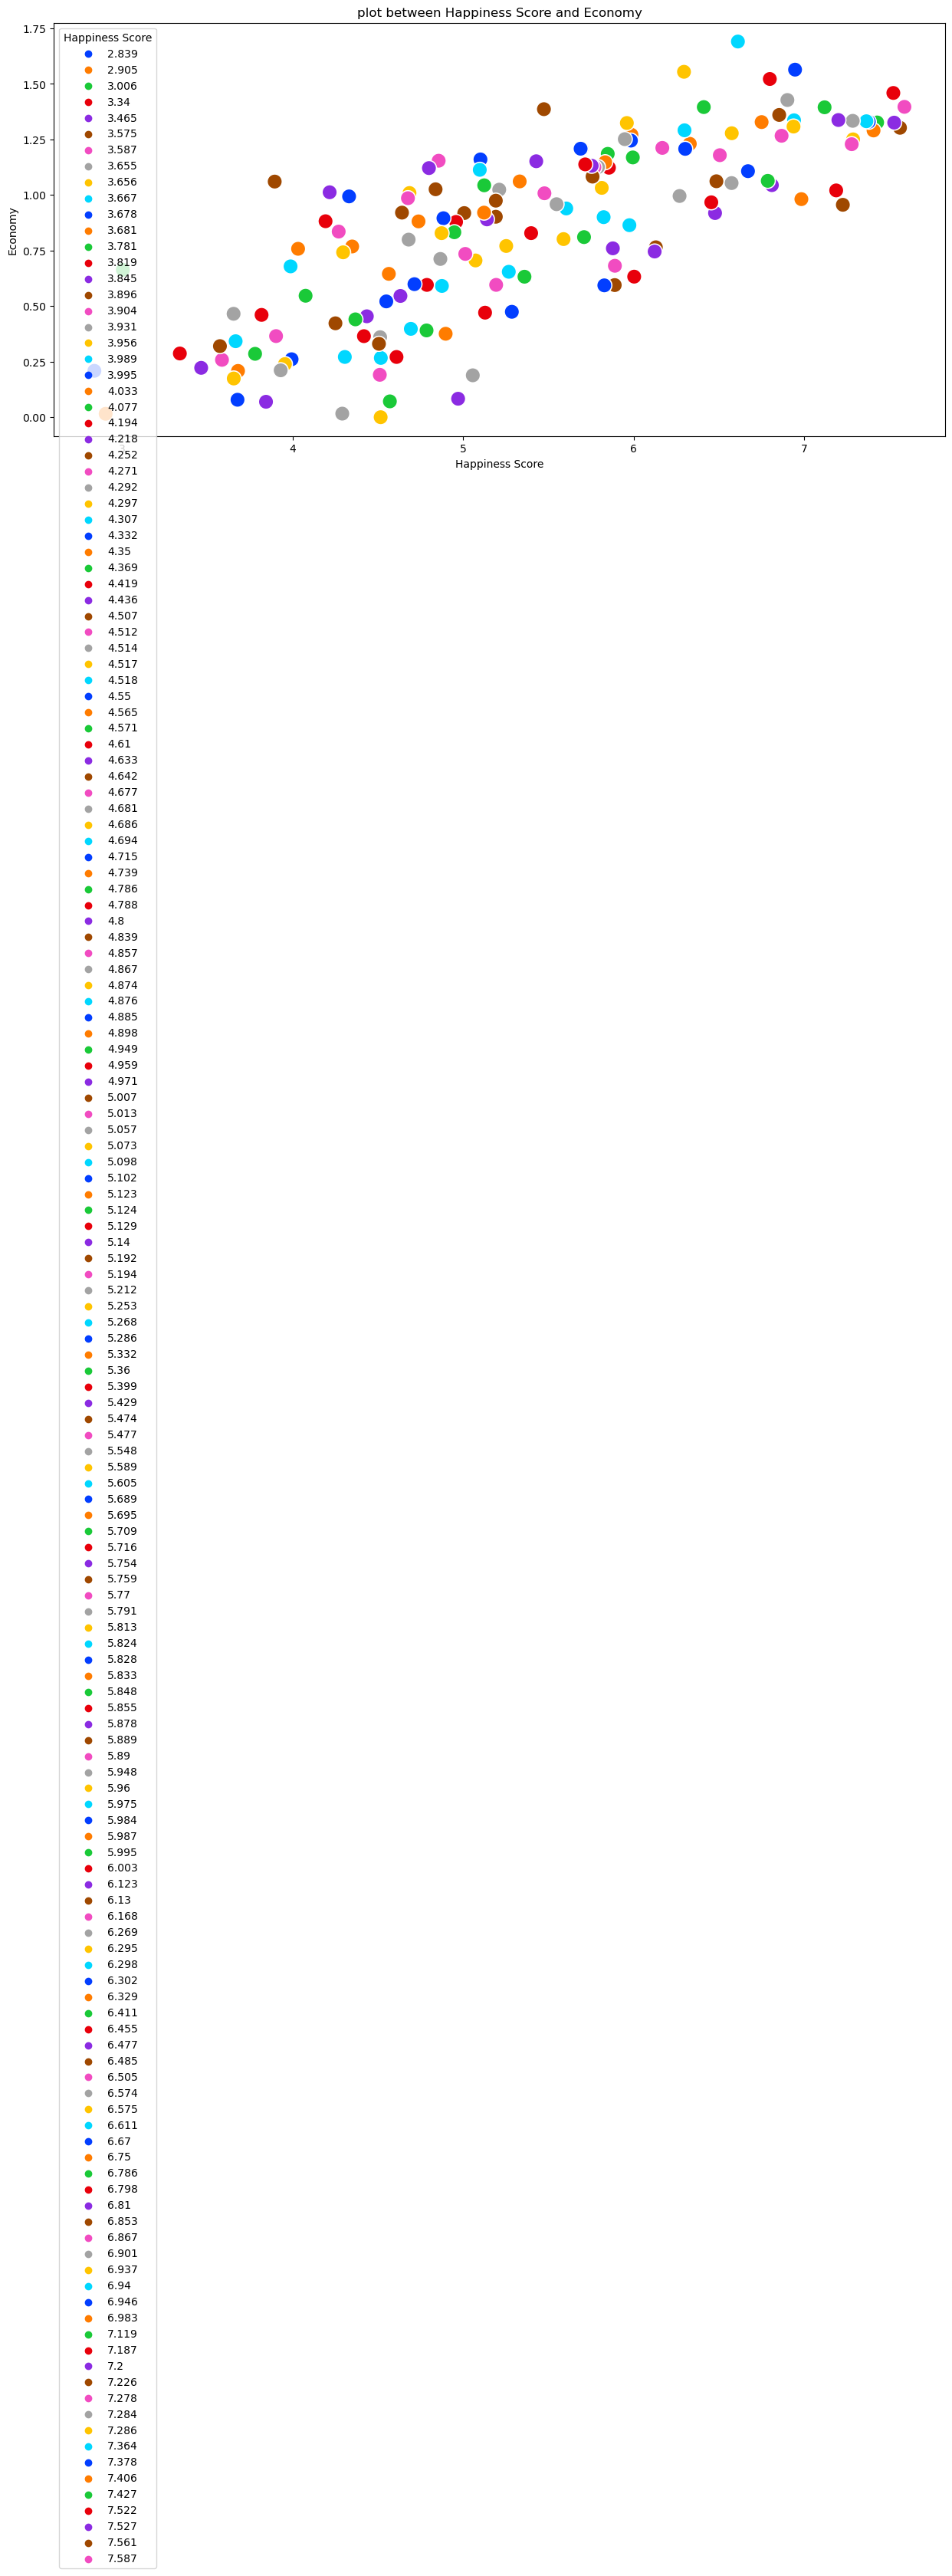

In [18]:
plt.figure (figsize=(15,7))
plt.title('plot between Happiness Score and Economy')
sns.scatterplot(df,x='Happiness Score',y='Economy (GDP per Capita)',hue='Happiness Score',palette='bright',s=200)
plt.xlabel('Happiness Score')
plt.ylabel('Economy')
plt.show()


<Axes: xlabel='Health (Life Expectancy)', ylabel='Economy (GDP per Capita)'>

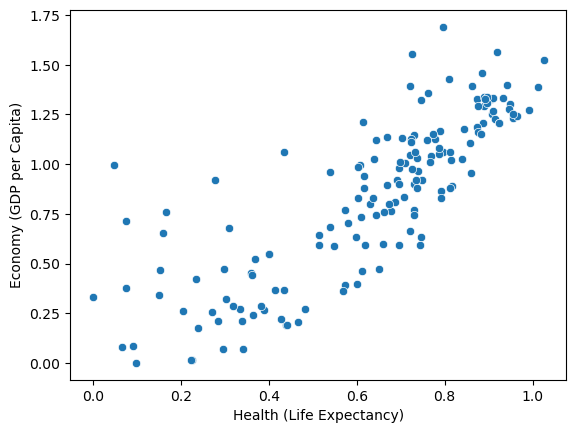

In [19]:
sns.scatterplot(df,x='Health (Life Expectancy)',y='Economy (GDP per Capita)',palette='bright')

<Axes: xlabel='Happiness Score', ylabel='Freedom'>

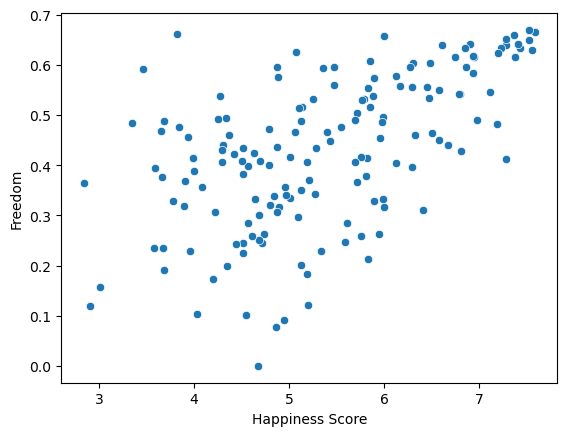

In [20]:
sns.scatterplot(df,x='Happiness Score',y='Freedom',palette='bright')

# Descriptive Analysis 

In [21]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1. The Economy (GDP per Capita) column exhibits a distribution where the median (50th percentile) surpasses the mean, indicating the presence of a left-skewed data distribution. 

2. Family has the left skewed distribution

# Correlation Check

In [22]:
df_cor=df.corr()
df_cor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<Axes: >

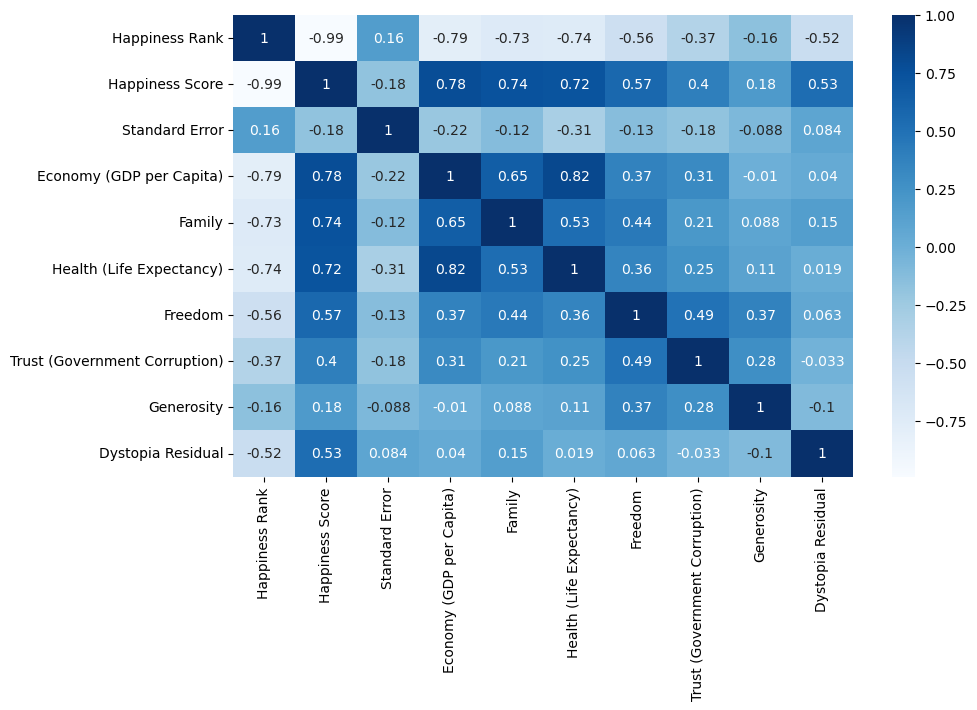

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,annot=True,cmap='Blues')

1. Happiness Score has a good Correlation with Economy, Family, Health, freedom , Trust , Generosity and Dystopia Residual column

2. I can concider there will be presence of multicollinearity between Economy, Family, Health column
    

In [24]:

Corruption=df.groupby('Region')[['Trust (Government Corruption)']].mean()
Corruption

,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


Australia and New Zealand has the highest Corruption &  Central and Eastern Europe has least Corruption based on the dataset

# Skewness Check

In [25]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [26]:
df['Standard Error']=np.cbrt(df['Standard Error'])

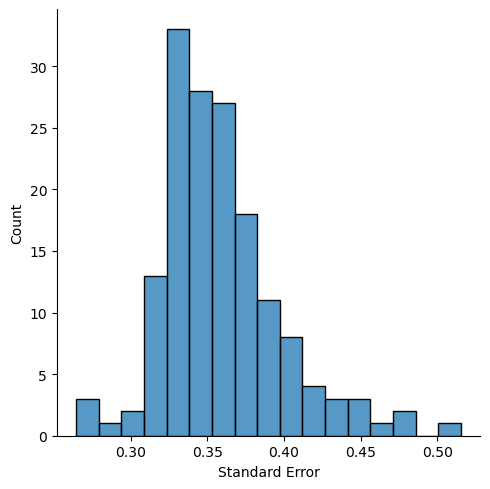

In [27]:
sns.displot(df['Standard Error'])

<Axes: xlabel='Trust (Government Corruption)', ylabel='Density'>

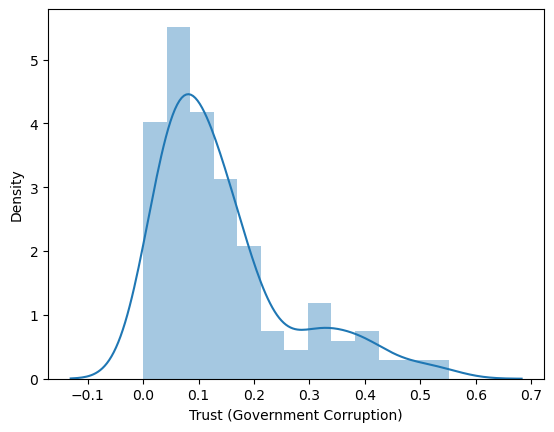

In [28]:
sns.distplot(df['Trust (Government Corruption)'])

In [29]:
df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])

<Axes: xlabel='Trust (Government Corruption)', ylabel='Density'>

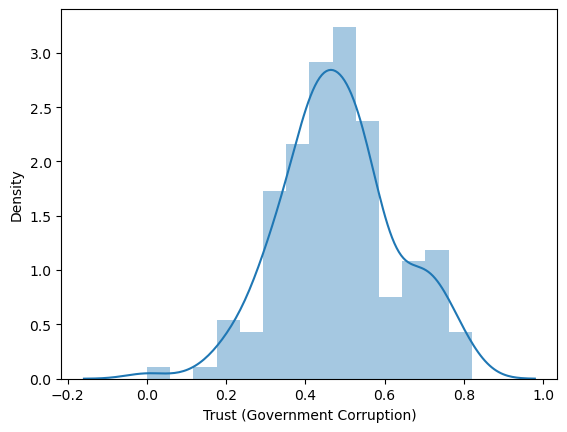

In [30]:
sns.distplot(df['Trust (Government Corruption)'])

In [31]:
df['Trust (Government Corruption)'].skew()

0.011931998380344316

<Axes: xlabel='Generosity', ylabel='Count'>

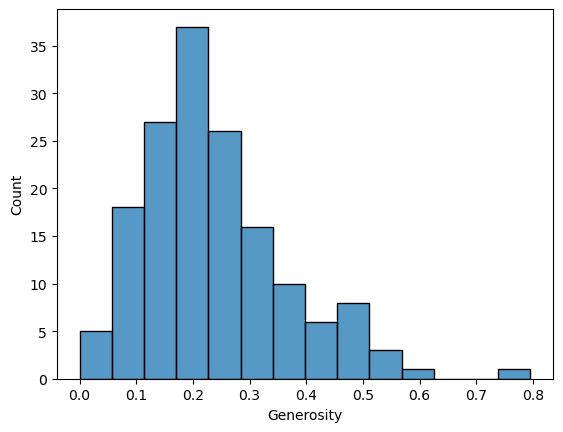

In [32]:
sns.histplot(df['Generosity'])

In [33]:
df['Generosity'].skew()

1.001960575563042

In [34]:
df['Generosity']=np.sqrt(df['Generosity'])

In [35]:
df['Generosity'].skew()

-0.13096114407238366

In [36]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.979748
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

Remove all the skewness from the column

# Split The data

In [40]:
x=df[['Country','Region','Happiness Rank','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]
y=df['Happiness Score']

In [41]:
x.head(5)

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.544775,2.51738
1,Iceland,Western Europe,2,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.660530,2.70201
2,Denmark,Western Europe,3,0.321658,1.32548,1.36058,0.87464,0.64938,0.784910,0.584286,2.49204
3,Norway,Western Europe,4,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.589059,2.46531
4,Canada,North America,5,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.676838,2.45176


In [42]:
y.head(5)

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [43]:
print (x.shape)
print (y.shape)

(158, 11)
(158,)


# Encoding Process

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
list=['Country','Region']
la=LabelEncoder()
for i in list:
    df[i]=la.fit_transform(df[i])

In [50]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.544775,2.51738
1,58,9,2,7.561,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.660530,2.70201
2,37,9,3,7.527,0.321658,1.32548,1.36058,0.87464,0.64938,0.784910,0.584286,2.49204
3,105,9,4,7.522,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.589059,2.46531
4,24,5,5,7.427,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.676838,2.45176


In [52]:
x=df[['Country','Region','Happiness Rank','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]
y=df['Happiness Score']

# Scaling Process

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,-1.721000,-0.892612,1.369621,1.320281,1.263408,1.577438,1.826993,0.572055,0.758258
1,-0.449465,1.300256,-1.699075,0.172283,1.135226,1.514458,1.289434,1.332456,0.260958,1.440806,1.092857
2,-0.909893,1.300256,-1.677149,-0.961125,1.192861,1.361054,0.992229,1.469659,2.075620,0.868586,0.712335
3,0.581016,1.300256,-1.655224,-0.524996,1.525130,1.251922,1.035145,1.605131,1.592625,0.904406,0.663893
4,-1.194920,-0.040302,-1.633299,-0.777930,1.194876,1.221204,1.118054,1.360416,1.428028,1.563200,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,-0.849442,-1.552987,-0.800520,-0.818610,1.087740,2.318782,0.053557,-2.588925
154,-1.436096,0.965117,1.655501,-0.696643,-1.392303,-2.346860,-1.263362,0.372033,-0.357762,-0.309478,-0.843967
155,1.260695,-0.375441,1.677427,0.255966,-0.455245,-1.901086,0.372199,-1.809238,0.624780,1.638487,-3.208430
156,-1.260695,0.965117,1.699352,2.157804,-2.067566,-2.118467,-1.649648,-2.064472,-0.123602,-0.183139,-0.481985


# VIF check

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif=pd.DataFrame()
vif['vif Factor']=[variance_inflation_factor(x.values,i) for i in range (len (x.columns))]
vif['Factor']=x.columns
vif

,vif Factor,Factor
0,1.083027,Country
1,1.466908,Region
2,71.565087,Happiness Rank
3,1.195995,Standard Error
4,13.416382,Economy (GDP per Capita)
5,5.429188,Family
6,8.036407,Health (Life Expectancy)
7,3.172486,Freedom
8,1.808627,Trust (Government Corruption)
9,2.142188,Generosity


Happiness Rank' and 'Economy' columns indicating high multicollinearity, I will drop these columns from the dataset to enhance the model's stability and interpretability.

In [61]:
df=df.drop(['Happiness Rank','Economy (GDP per Capita)'],axis=1)

In [62]:
df.head(5)

,Country,Region,Happiness Score,Standard Error,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.324310,1.34951,0.94143,0.66557,0.748756,0.544775,2.51738
1,58,9,7.561,0.365532,1.40223,0.94784,0.62877,0.521036,0.660530,2.70201
2,37,9,7.527,0.321658,1.36058,0.87464,0.64938,0.784910,0.584286,2.49204
3,105,9,7.522,0.338540,1.33095,0.88521,0.66973,0.714677,0.589059,2.46531
4,24,5,7.427,0.328749,1.32261,0.90563,0.63297,0.690742,0.676838,2.45176


# Data Modeling

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [64]:
maxAcc=0
maxRE=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    li=LinearRegression()
    li.fit (x_train,y_train)
    pred_li=li.predict(x_test)
    acc=r2_score(pred_li,y_test)
    if acc>maxAcc:
        maxAcc=acc
        maxRE=i
print ("Maximum R2 Score:",maxAcc,"Best Random Estate:",maxRE)
        

Maximum R2 Score: 0.998977264942523 Best Random Estate: 26


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import cross_val_score

In [106]:
def regression (model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=26)
    model.fit (x_train,y_train)
    print ("Model Traning Score:",model.score(x_train,y_train))
    pred_model=model.predict(x_test)
    print (pred_model)
    print ("Best r2 Score:",r2_score(pred_model,y_test))
    print ("Mean absolute error:",mean_absolute_error(pred_model,y_test))
    print ("Mean Squared Error:", mean_squared_error (pred_model,y_test))
    print ("Root mean squared Error:",np.sqrt(mean_squared_error(pred_model,y_test)))
    
    score=cross_val_score(model,x,y,cv=5)
    print ("CV score:",np.mean(score))
    print ("Difference between r2 score and cross val score:", r2_score(pred_model,y_test) - np.mean(score))
    
    
      
    

In [107]:
model=LinearRegression()
regression (model)


Model Traning Score: 0.9976173175767246
[3.62279778 5.60951844 3.58802204 5.1412574  5.38364414 5.46770287
 3.68116947 6.84535786 5.93023392 5.22611683 4.93043124 4.15060687
 6.49695975 4.0006644  3.67848335 6.81657525 5.03517493 4.51529518
 4.01568512 6.84728291 6.7010178  7.43071303 5.733234   4.84573156
 3.94305613 7.5671625  6.98536884 6.51874428 4.45044802 3.67282688
 4.25143615 5.09466002 4.79328925 7.14627041 4.97390695 6.16585413
 4.72523718 4.80606926 4.19760826 6.59914605 7.18190682 7.36000454
 5.45909437 7.17553382 6.94002156 5.12474382 6.0181228  4.35195846]
Best r2 Score: 0.998977264942523
Mean absolute error: 0.029330513294800593
Mean Squared Error: 0.0015077567259858765
Root mean squared Error: 0.03882984323926478
CV score: 0.9228389311050927
Difference between r2 score and cross val score: 0.0761383338374303


In [108]:
model=RandomForestRegressor()
regression (model)

Model Traning Score: 0.9992478091618152
[3.5952  5.61193 3.32376 5.0957  5.2865  5.4049  3.72708 6.83731 5.92199
 5.21426 4.89004 4.22569 6.56377 3.90364 3.52894 6.82719 4.98721 4.51129
 3.9658  6.92877 6.66765 7.47146 5.69101 4.93004 3.88873 7.42669 6.9304
 6.44542 4.47115 3.52813 4.29823 5.11975 4.85984 7.07878 4.96965 6.17381
 4.73835 4.82546 4.05299 6.59084 7.38194 7.38447 5.49001 7.1815  7.00682
 5.08021 5.99475 4.34754]
Best r2 Score: 0.9972507848288481
Mean absolute error: 0.04265562500000001
Mean Squared Error: 0.004224781610416714
Root mean squared Error: 0.06499832005841931
CV score: -1.7303659329321939
Difference between r2 score and cross val score: 2.727616717761042


In [109]:
model=DecisionTreeRegressor()
regression (model)

Model Traning Score: 1.0
[3.465 5.589 3.681 5.013 5.286 5.399 3.681 6.786 5.975 5.129 4.867 4.297
 6.575 4.033 3.681 6.786 5.013 4.518 3.931 6.901 6.611 7.587 5.695 4.959
 3.931 7.587 6.983 6.477 4.518 3.681 4.297 5.14  4.857 6.901 4.959 6.168
 4.715 4.715 4.033 6.575 7.364 7.587 5.477 7.378 6.946 5.013 5.995 4.369]
Best r2 Score: 0.9964565803261104
Mean absolute error: 0.05381250000000002
Mean Squared Error: 0.0054078125
Root mean squared Error: 0.07353783040041365
CV score: -1.355868909590352
Difference between r2 score and cross val score: 2.3523254899164625


In [79]:
model=KNeighborsRegressor()
regression (model)


Model Traning Score: 0.9214669586589872
Best r2 Score: 0.9080058292387314
Mean absolute error: 0.29485416666666664
Mean Squared Error: 0.1201747058333333
Root mean squared Error: 0.3466622359492497
CV score: -4.721274461451164
Difference between r2 score and cross val score: 5.629280290689895


In [110]:
model=Ridge()
regression (model)

Model Traning Score: 0.9974201643147946
[3.63097799 5.61638853 3.58727069 5.13369131 5.38616056 5.47546657
 3.68613148 6.83407331 5.94663475 5.23095012 4.92884297 4.12972058
 6.4980668  3.98896406 3.67952876 6.81347936 5.02708751 4.50036249
 4.01624398 6.85305659 6.69208499 7.42275922 5.72059861 4.84436743
 3.93935498 7.53724781 6.97903785 6.51990615 4.43734973 3.66934135
 4.2364408  5.09765993 4.78192046 7.12032669 4.98673878 6.17705417
 4.70965085 4.79641266 4.17131517 6.59815138 7.17549907 7.35041801
 5.46769337 7.1471086  6.94258754 5.12612975 6.0517647  4.3405891 ]
Best r2 Score: 0.9987888057121257
Mean absolute error: 0.03242241175733668
Mean Squared Error: 0.001783070138987694
Root mean squared Error: 0.04222641518040211
CV score: 0.9089160589720994
Difference between r2 score and cross val score: 0.08987274674002632


In [111]:
model=Lasso()
regression (model)


Model Traning Score: 0.09986027683543452
[5.25696058 5.36605492 5.25566184 5.33878133 5.35566498 5.35956121
 5.26085681 5.42579705 5.38813353 5.34917127 5.32709265 5.28033794
 5.41410837 5.27384423 5.25955807 5.42060208 5.33358636 5.29592284
 5.27514297 5.42709579 5.41930334 5.45047315 5.36735366 5.32969014
 5.269948   5.45177189 5.42969328 5.41280963 5.29332536 5.26215555
 5.28163668 5.34008007 5.3193002  5.43488825 5.33228762 5.39852347
 5.31540398 5.31800146 5.2790392  5.41540712 5.4426807  5.44657693
 5.36085995 5.43618699 5.43099202 5.33748259 5.39722473 5.28813039]
Best r2 Score: -330.133565236271
Mean absolute error: 0.9933326058001392
Mean Squared Error: 1.3454947050071875
Root mean squared Error: 1.159954613339327
CV score: -17.524823840209333
Difference between r2 score and cross val score: -312.6087413960617


In [113]:
model=ExtraTreesRegressor()
regression (model)

Model Traning Score: 1.0
[3.59041 5.56914 3.39044 5.12742 5.33824 5.45912 3.66969 6.82153 5.9095
 5.22966 4.89348 4.19225 6.51798 3.92274 3.5468  6.75893 5.02566 4.47431
 4.00316 6.94642 6.67205 7.48658 5.59585 4.93214 3.91102 7.42591 6.98265
 6.5345  4.44907 3.57359 4.19849 5.1643  4.82869 7.07544 4.97401 6.10497
 4.72596 4.77848 4.14361 6.5907  7.33019 7.38775 5.53868 7.00904 7.03748
 5.09608 6.12155 4.40576]
Best r2 Score: 0.99738436159149
Mean absolute error: 0.0453829166666663
Mean Squared Error: 0.00396485877500003
Root mean squared Error: 0.06296712455718484
CV score: -0.6766895166215974
Difference between r2 score and cross val score: 1.6740738782130875


In [86]:
model=SVR()
regression (model)


Model Traning Score: 0.9828224754231709
Best r2 Score: 0.9578888994100214
Mean absolute error: 0.16786082509084085
Mean Squared Error: 0.052870389765611155
Root mean squared Error: 0.22993562091509692
CV score: -3.166406245136894
Difference between r2 score and cross val score: 4.124295144546916


In [114]:
model=SGDRegressor()
regression (model)


Model Traning Score: 0.9949599636509544
[3.52411669 5.54459219 3.52637742 5.07235949 5.41606421 5.39838917
 3.58710324 6.81065802 5.9040445  5.30737327 4.82366696 3.9899113
 6.45195774 3.88195588 3.63339428 6.74362306 4.98774891 4.45545075
 3.93256412 6.86795104 6.64933128 7.35079954 5.67557116 4.80567869
 3.89089516 7.46514315 6.89747076 6.53998553 4.38264004 3.63869101
 4.0996639  5.06639746 4.68383615 7.1085702  4.96468356 6.15763225
 4.74274231 4.74417467 4.08052065 6.52888613 7.15188671 7.2892708
 5.41589351 7.15852151 6.88823107 5.09029547 6.08132183 4.13116824]
Best r2 Score: 0.9954640187460516
Mean absolute error: 0.06409616323080129
Mean Squared Error: 0.006872435086141011
Root mean squared Error: 0.08290015130348684
CV score: 0.3163002613740001
Difference between r2 score and cross val score: 0.6791637573720515


After evaluating various regression models based on the difference in R2 scores and cross-validation scores, Linear Regressor is identified as the most suitable model for the given dataset.

# Hyperparameter tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param={'fit_intercept':[True,False],
      'normalize':[True,False],
      'n_jobs':[1.0,0.5,2,5,],
      'positive':[True,False]}

In [91]:
gscv=GridSearchCV(LinearRegression(),param,cv=5)
gscv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [1.0, 0.5, 2, 5], 'normalize': [True, False],
                         'positive': [True, False]})

In [92]:
gscv.best_params_

{'fit_intercept': True, 'n_jobs': 1.0, 'normalize': True, 'positive': False}

# Final Model Build

In [117]:

li=LinearRegression(fit_intercept=True,n_jobs=1.0,normalize=True,positive=False)
li.fit (x_train,y_train)
print ("Model Score:",li.score(x_train,y_train))
pred_li=li.predict(x_test)
print("R2 Score:", r2_score(pred_li,y_test))
print ("Mean absolute Error:",mean_absolute_error(pred_li,y_test))
print ("Mean sqyared Error:",mean_squared_error(pred_li,y_test))
print ("Root mean squared Error:", np.sqrt(mean_squared_error(pred_li,y_test)))
print (pred_li)




Model Score: 0.9984589149705622
R2 Score: 0.9967082608454315
Mean absolute Error: 0.041508780751707275
Mean sqyared Error: 0.0032841582012675882
Root mean squared Error: 0.05730757542653142
[5.16264691 2.91379309 5.12917153 4.96605633 3.6993248  6.49281464
 7.16060314 4.86146409 5.85998018 5.92264919 3.91275176 4.79441628
 6.51495071 7.42575505 4.93474977 4.49916546 5.10424956 5.59688796
 4.96605639 6.84438952 5.69140466 3.99674914 6.4072819  5.21787317
 5.28212342 4.15330022 5.57107238 5.82689035 4.62770809 5.90002854
 5.83345469 4.69354196 3.95169219 4.28889577 6.05015158 4.15469147
 6.2944372  4.83981494 4.8827617  3.67876256 6.04452928 4.67896758
 6.34520923 3.66782239 5.0300086  6.00251192 5.06571611 6.72400951]


# Saving the Best Model

In [94]:
import joblib

In [118]:
joblib.dump(li,'LG_model.obj')

['LG_model.obj']

# Checking Model

In [120]:
Best_fit_model=joblib.load('LG_model.obj')
Best_fit_model

LinearRegression(n_jobs=1.0, normalize=True)

In [101]:
def predict_hapiness_score(p):
    p=p.reshape(1,-1)
    pred=Best_fit_model.predict(p)
    print ("Predict valus:",pred)
    
    
    

In [121]:
p=np.array([1.254870,2.300256,-1.714800,-1.892612,1.369621,2.320281,1.278908,2.575238,1.845793,1.545055,1.758258])
predict_hapiness_score(p)

Predict valus: [8.51969532]
